In [1]:
#importing packages and identifying/importing csv file
import pandas as pd
import warnings
import statistics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
warnings.simplefilter(action='ignore', category=FutureWarning)
medical=pd.read_csv('medical_clean.csv')

In [2]:
# profiling dataframe. No null values
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
medical.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


Begin identifying duplicates section

In [4]:
# identifying any duplicates
medical.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# seeing full value count of duplicates: no duplicates in file
print(medical.duplicated().value_counts())

False    10000
Name: count, dtype: int64


Begin missing data identification section

In [6]:
# looking into missing data
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

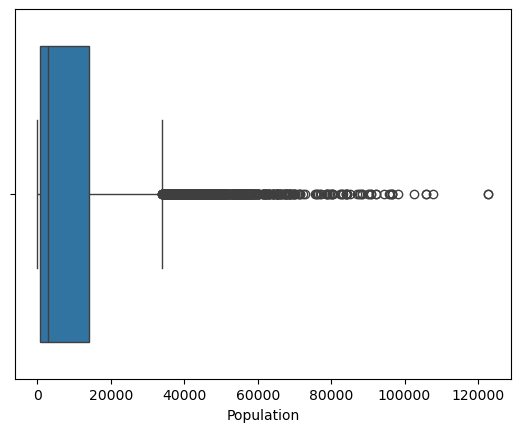

In [7]:
# look at boxplot of Population variable to identify outliers
boxplot=sns.boxplot(x='Population',data=medical)
# Outliers will be retained due to the large number of outliers and the expected diversity

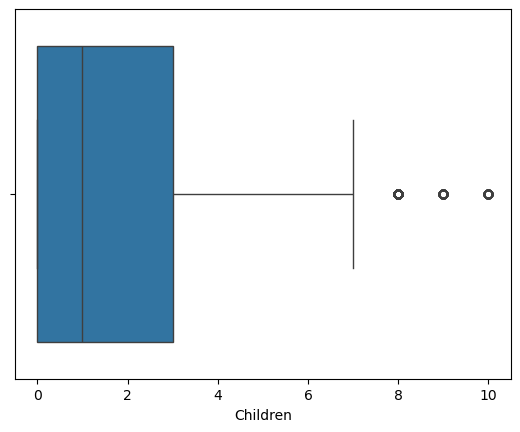

In [8]:
# look at boxplot of Children variable to identify outliers
boxplot=sns.boxplot(x='Children',data=medical) 
# outliers will be retained because these values are expected diversity

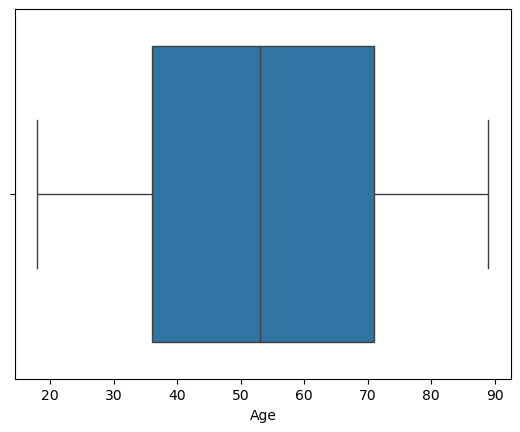

In [9]:
# look at boxplot of Age variable to identify outliers
boxplot=sns.boxplot(x='Age',data=medical) 
# no outliers

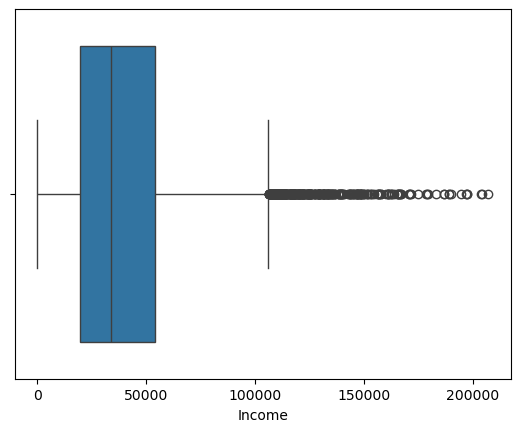

In [10]:
# look at boxplot of Income variable to identify outliers
boxplot=sns.boxplot(x='Income',data=medical) 
# Outliers will be retained because they add expected diversity

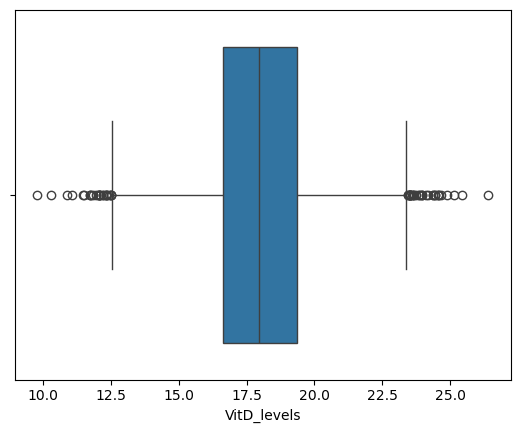

In [11]:
# look at boxplot of vit D levels variable to identify outliers
boxplot=sns.boxplot(x='VitD_levels',data=medical) 
# Outliers will be retained

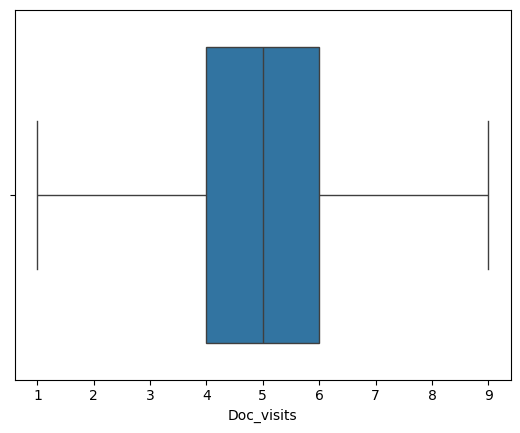

In [12]:
# look at boxplot of doc visits variable
boxplot=sns.boxplot(x='Doc_visits',data=medical) 
# no outliers

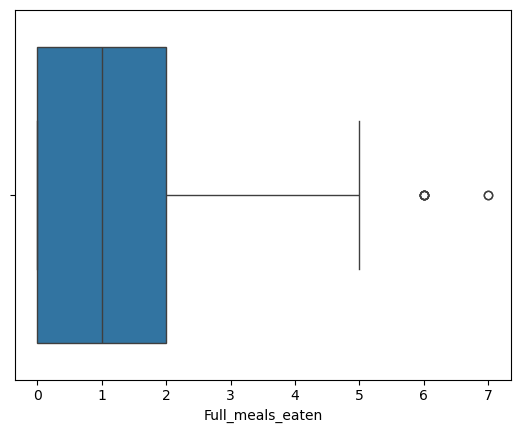

In [13]:
# look at boxplot of full meals eaten variable
boxplot=sns.boxplot(x='Full_meals_eaten',data=medical) 
# Outliers will be retained

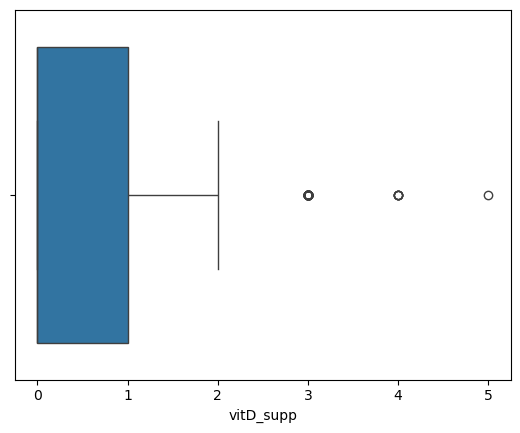

In [14]:
# look at boxplot of vit D supplement variable
boxplot=sns.boxplot(x='vitD_supp',data=medical)
# Outliers will be retained

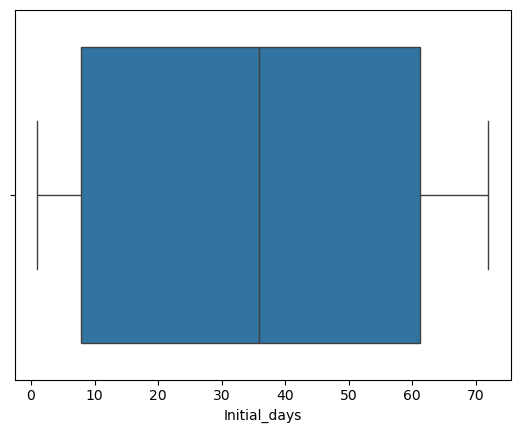

In [15]:
# look at boxplot of initial days variable
boxplot=sns.boxplot(x='Initial_days',data=medical)
# no outliers

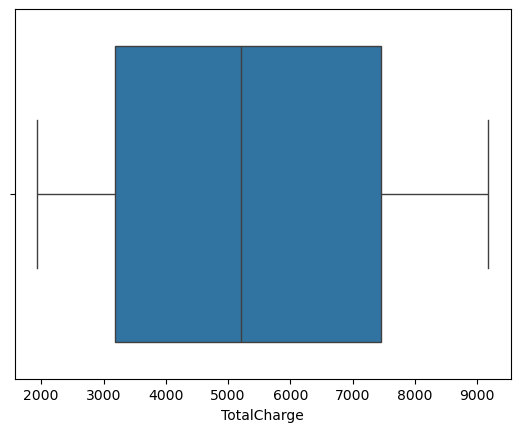

In [16]:
# look at boxplot of TotalCharge variable
boxplot=sns.boxplot(x='TotalCharge',data=medical)
# no outliers

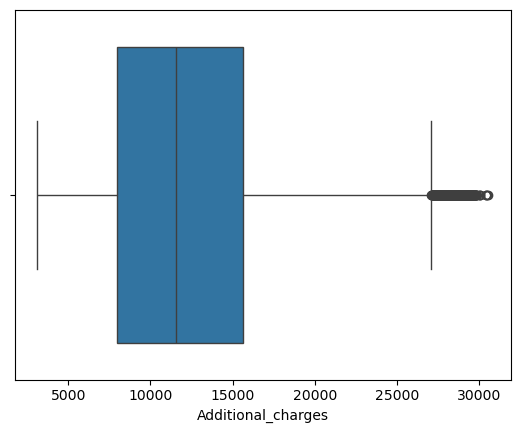

In [17]:
# look at boxplot of Additional_charges variable
boxplot=sns.boxplot(x='Additional_charges',data=medical)
# Outliers will be retained for expected diversity

In [18]:
# recode ReAdmis into numeric
medical['ReAdmis_numeric']=medical['ReAdmis'].replace({"Yes": 1, "No": 0})
medical.ReAdmis_numeric.value_counts()

ReAdmis_numeric
0    6331
1    3669
Name: count, dtype: int64

In [19]:
# recode soft drink into numeric
medical['Soft_drink_numeric']=medical['Soft_drink'].replace({"Yes": 1, "No": 0})
medical.Soft_drink_numeric.value_counts()

Soft_drink_numeric
0    7425
1    2575
Name: count, dtype: int64

In [20]:
# recode Diabetes into numeric
medical['Diabetes_numeric']=medical['Diabetes'].replace({"Yes": 1, "No": 0})
medical.Diabetes_numeric.value_counts()

Diabetes_numeric
0    7262
1    2738
Name: count, dtype: int64

In [21]:
# recode stroke into numeric
medical['Stroke_numeric']=medical['Stroke'].replace({"Yes": 1, "No": 0})
medical.Stroke_numeric.value_counts()

Stroke_numeric
0    8007
1    1993
Name: count, dtype: int64

In [22]:
# recode highblood into numeric
medical['Highblood_numeric']=medical['HighBlood'].replace({"Yes": 1, "No": 0})
medical.Highblood_numeric.value_counts()

Highblood_numeric
0    5910
1    4090
Name: count, dtype: int64

In [23]:
# recode arthritis into numeric
medical['Arthritis_numeric']=medical['Arthritis'].replace({"Yes": 1, "No": 0})
medical.Arthritis_numeric.value_counts()

Arthritis_numeric
0    6426
1    3574
Name: count, dtype: int64

In [24]:
# recode hyperlipidemia into numeric
medical['Hyperlipidemia_numeric']=medical['Hyperlipidemia'].replace({"Yes": 1, "No": 0})
medical.Hyperlipidemia_numeric.value_counts()

Hyperlipidemia_numeric
0    6628
1    3372
Name: count, dtype: int64

In [25]:
# recode backpain into numeric
medical['BackPain_numeric']=medical['BackPain'].replace({"Yes": 1, "No": 0})
medical.BackPain_numeric.value_counts()

BackPain_numeric
0    5886
1    4114
Name: count, dtype: int64

In [26]:
# recode anxiety into numeric
medical['Anxiety_numeric']=medical['Anxiety'].replace({"Yes": 1, "No": 0})
medical.Anxiety_numeric.value_counts()

Anxiety_numeric
0    6785
1    3215
Name: count, dtype: int64

In [27]:
# recode allergic rhinitis into numeric
medical['Allergic_rhinitis_numeric']=medical['Allergic_rhinitis'].replace({"Yes": 1, "No": 0})
medical.Allergic_rhinitis_numeric.value_counts()

Allergic_rhinitis_numeric
0    6059
1    3941
Name: count, dtype: int64

In [28]:
# recode reflux esophagitis into numeric
medical['Reflux_esophagitis_numeric']=medical['Reflux_esophagitis'].replace({"Yes": 1, "No": 0})
medical.Reflux_esophagitis_numeric.value_counts()

Reflux_esophagitis_numeric
0    5865
1    4135
Name: count, dtype: int64

In [29]:
# recode asthma into numeric
medical['Asthma_numeric']=medical['Asthma'].replace({"Yes": 1, "No": 0})
medical.Asthma_numeric.value_counts()

Asthma_numeric
0    7107
1    2893
Name: count, dtype: int64

In [30]:
# recode complication risk into numeric
medical['Complication_risk_numeric']=medical['Complication_risk'].replace({"Low": 0, "Medium": 1, "High": 2})
medical.Complication_risk_numeric.value_counts()

Complication_risk_numeric
1    4517
2    3358
0    2125
Name: count, dtype: int64

In [31]:
# recode overweight into numeric
medical['Overweight_numeric']=medical['Overweight'].replace({"Yes": 1, "No": 0})
medical.Overweight_numeric.value_counts()

Overweight_numeric
1    7094
0    2906
Name: count, dtype: int64

In [32]:
# one hot encode initial admin (emergency)
medical['Emergency_numeric']=medical['Initial_admin'].replace({"Emergency Admission": 1, "Elective Admission": 0, 
                                                       "Observation Admission": 0})
medical.Emergency_numeric.value_counts()

Emergency_numeric
1    5060
0    4940
Name: count, dtype: int64

In [33]:
# one hot encode initial admin (elective)
medical['Elective_numeric']=medical['Initial_admin'].replace({"Emergency Admission": 0, "Elective Admission": 1, 
                                                       "Observation Admission": 0})
medical.Elective_numeric.value_counts()

Elective_numeric
0    7496
1    2504
Name: count, dtype: int64

In [34]:
# one hot encode services (intravenous)
medical['Intravenous_numeric']=medical['Services'].replace({"Intravenous": 1, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 0})
medical.Intravenous_numeric.value_counts()

Intravenous_numeric
0    6870
1    3130
Name: count, dtype: int64

In [35]:
# one hot encode services (CT Scan)
medical['CTScan_numeric']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 1, "MRI": 0})
medical.CTScan_numeric.value_counts()

CTScan_numeric
0    8775
1    1225
Name: count, dtype: int64

In [36]:
# one hot encode services (MRI)
medical['MRI_numeric']=medical['Services'].replace({"Intravenous": 0, "Blood Work": 0, 
                                                       "CT Scan": 0, "MRI": 1})
medical.MRI_numeric.value_counts()

MRI_numeric
0    9620
1     380
Name: count, dtype: int64

In [37]:
# one hot encode Area (suburban)
medical['Suburban_numeric']=medical['Area'].replace({"Urban": 0, "Rural": 0, 
                                                       "Suburban": 1})
medical.Suburban_numeric.value_counts()

Suburban_numeric
0    6672
1    3328
Name: count, dtype: int64

In [38]:
# one hot encode Area (urban)
medical['Urban_numeric']=medical['Area'].replace({"Urban": 1, "Rural": 0, 
                                                       "Suburban": 0})
medical.Urban_numeric.value_counts()

Urban_numeric
0    6697
1    3303
Name: count, dtype: int64

In [39]:
# one hot encode marital (divorced)
medical['Divorced_numeric']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 1})
medical.Divorced_numeric.value_counts()

Divorced_numeric
0    8039
1    1961
Name: count, dtype: int64

In [40]:
# one hot encode marital (married)
medical['Married_numeric']=medical['Marital'].replace({"Widowed": 0, "Married": 1, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
medical.Married_numeric.value_counts()

Married_numeric
0    7977
1    2023
Name: count, dtype: int64

In [41]:
# one hot encode marital (Never married)
medical['NeverMarried_numeric']=medical['Marital'].replace({"Widowed": 0, "Married": 0, "Separated": 0,"Never Married": 1, 
                                                       "Divorced": 0})
medical.NeverMarried_numeric.value_counts()

NeverMarried_numeric
0    8016
1    1984
Name: count, dtype: int64

In [42]:
# one hot encode marital (widowed)
medical['Widowed_numeric']=medical['Marital'].replace({"Widowed": 1, "Married": 0, "Separated": 0,"Never Married": 0, 
                                                       "Divorced": 0})
medical.Widowed_numeric.value_counts()

Widowed_numeric
0    7955
1    2045
Name: count, dtype: int64

In [43]:
# one hot encode gender (nonbinary)
medical['Nonbinary_numeric']=medical['Gender'].replace({"Male": 0, "Female": 0, "Nonbinary": 1})
medical.Nonbinary_numeric.value_counts()

Nonbinary_numeric
0    9786
1     214
Name: count, dtype: int64

In [44]:
# one hot encode gender (male)
medical['Male_numeric']=medical['Gender'].replace({"Male": 1, "Female": 0, "Nonbinary": 0})
medical.Male_numeric.value_counts()

Male_numeric
0    5232
1    4768
Name: count, dtype: int64

In [45]:
medical_std=medical.drop(['ReAdmis', 'Gender', 'Services', 'Marital', 'Area', 'Initial_admin', 'Soft_drink', 'HighBlood',
                         'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Customer_id', 'Interaction',
                        'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'CaseOrder'], axis=1)

In [46]:
# saving the dataframe 'medical_prepared' as a CSV file 
medical_std.to_csv('medical_prepared.csv', index = True)

Do select K best for 5 features of highest signficance

In [47]:
X = medical_std.drop(['ReAdmis_numeric'],axis = 1)
y = medical_std['ReAdmis_numeric']
print(X.shape)
print(y.shape)

(10000, 45)
(10000,)


In [48]:
# perform scaling on continuous variables
scale = StandardScaler()

scaledX = pd.DataFrame(scale.fit_transform(X), columns = X.columns)

scaledX

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,...,CTScan_numeric,MRI_numeric,Suburban_numeric,Urban_numeric,Divorced_numeric,Married_numeric,NeverMarried_numeric,Widowed_numeric,Nonbinary_numeric,Male_numeric
0,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,...,-0.373632,-0.198749,1.415912,-0.702286,2.024707,-0.503591,-0.497499,-0.507022,-0.147878,1.047528
1,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,...,-0.373632,-0.198749,-0.706258,1.423921,-0.493899,1.985738,-0.497499,-0.507022,-0.147878,-0.954628
2,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,...,-0.373632,-0.198749,1.415912,-0.702286,-0.493899,-0.503591,-0.497499,1.972302,-0.147878,-0.954628
3,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,...,-0.373632,-0.198749,1.415912,-0.702286,-0.493899,1.985738,-0.497499,-0.507022,-0.147878,1.047528
4,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,...,2.676428,-0.198749,-0.706258,-0.702286,-0.493899,-0.503591,-0.497499,1.972302,-0.147878,-0.954628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.351002,-0.044926,-1.381548,0.192047,-0.487525,-0.967981,0.990609,0.956445,0.650217,0.705765,...,-0.373632,-0.198749,-0.706258,1.423921,-0.493899,-0.503591,-0.497499,1.972302,-0.147878,1.047528
9996,-0.587847,0.879480,1.622691,-0.894380,0.105476,-0.011667,-0.993387,-0.634713,1.300475,1.114312,...,2.676428,-0.198749,-0.706258,1.423921,-0.493899,-0.503591,-0.497499,1.972302,-0.147878,1.047528
9997,-0.636349,0.417277,-0.412438,0.891569,-0.414049,-0.967981,0.990609,-0.634713,1.356958,1.359597,...,-0.373632,-0.198749,-0.706258,-0.702286,-0.493899,-0.503591,-0.497499,-0.507022,-0.147878,-0.954628
9998,-0.653956,0.417277,-0.509349,-0.378271,0.964820,-0.011667,0.990609,0.956445,1.098585,1.069727,...,-0.373632,-0.198749,-0.706258,-0.702286,2.024707,-0.503591,-0.497499,-0.507022,-0.147878,1.047528


In [49]:
feature_names = scaledX.columns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skbest = SelectKBest(score_func = f_classif, k='all')
X_new = skbest.fit_transform(scaledX, y)
X_new.shape

(10000, 45)

In [50]:
### Finding P-values to select statistically significant features 
p_values = pd.DataFrame({'Feature': scaledX.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
sig_features=p_values[p_values['p_value'] < .05]

# get 5 features with lowest p values
sig_features.head(n=5)

,Feature,p_value
9,TotalCharge,0.000000
8,Initial_days,0.000000
35,CTScan_numeric,0.014707
1,Children,0.018613
39,Divorced_numeric,0.030143


Split data into train and test 

In [51]:
from sklearn.model_selection import train_test_split
scaledX = scaledX[['TotalCharge','Initial_days','CTScan_numeric','Children','Divorced_numeric']]
y = medical_std['ReAdmis_numeric']
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, stratify = y, random_state=1)

In [52]:
training_data=[X_train,y_train]
med_train=pd.concat(training_data,axis=1)
testing_data=[X_test, y_test]
med_test=pd.concat(testing_data,axis=1)

#save out data
med_train.to_csv('medical_train.csv')
med_test.to_csv('medical_test.csv')

Get best number of neighbors

In [53]:
#finding best K-value 
knn = KNeighborsClassifier() 
k_range = list(range(1,101)) 
param_grid = dict(n_neighbors = k_range) 

In [54]:
#Defining parameter range 
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', return_train_score = False, verbose = 1) 

#Fitting the model for grid search 
grid_search = grid.fit(X_train, y_train) 

print('The best K value is: ') 
print(grid_search.best_params_) 

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The best K value is: 
{'n_neighbors': 10}


fit and run Knn model

In [55]:
#Fit KNN model 
knn = KNeighborsClassifier(n_neighbors = 6) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=6)

In [56]:
#Confusion matrix of test model 
y_pred = knn.predict(X_test) 
print(confusion_matrix(y_test, y_pred)) 

[[1244   22]
 [  29  705]]


In [57]:
#Accuracy 
print('test_accuracy: ', knn.score(X_test, y_test)) 
print('training_accuracy: ', knn.score(X_train, y_train))

test_accuracy:  0.9745
training_accuracy:  0.98175


Evaluation of model

In [58]:
#AUC ROC of model 
y_predProb = knn.predict_proba(X_test)[:,1] 
print(roc_auc_score(y_test, y_predProb))

0.99539356724391
